In [1]:
from sklearn.cluster import KMeans
import clusters as cl
from sklearn.datasets import make_blobs

# this will reload modules that have changed
%load_ext autoreload
%autoreload 2

In [2]:
X, y = make_blobs(n_samples=20, centers=3, n_features=2,
...                   random_state=0)
>>> print(X)


[[ 1.12031365  5.75806083]
 [-1.91423083  2.61557951]
 [ 1.28933778  3.44969159]
 [ 2.21021495  1.27582618]
 [ 4.32502215 -0.55670201]
 [-2.57545698  1.49786432]
 [-3.2331742   4.86865766]
 [ 1.16748177 -1.08313281]
 [ 0.87305123  4.71438583]
 [ 1.9263585   4.15243012]
 [ 3.58804674  2.36702243]
 [ 2.47034915  4.09862906]
 [-0.49772229  1.55128226]
 [ 2.10102604  0.71047981]
 [ 1.7373078   4.42546234]
 [-2.03655619  2.47980796]
 [-0.29661333  4.12026211]
 [-1.87481616  3.07423123]
 [ 2.91970372  0.15549864]
 [ 1.42013331  4.63746165]]


Create data and data labels for each point

In [3]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12, 3, 3, 3, 3]
z = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 21, 40, 40, 40]
data = list(X)
labels = ["dog", "dog", "cat", "dog", "dog", "dog", "cat", "dog", "cat", "cat", "dog", "horse", "horse", "horse"] 
print(y)

[0 2 0 1 1 2 2 1 0 0 1 0 1 1 0 2 2 2 1 0]


In [4]:
k = cl.K(data)
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(n_clusters=3)

In [5]:
print(y)
print(kmeans.labels_)

[0 2 0 1 1 2 2 1 0 0 1 0 1 1 0 2 2 2 1 0]
[0 1 0 2 2 1 1 2 0 0 2 0 1 2 0 1 0 1 2 0]


In [6]:
cl.labelClusters(kmeans.labels_, y)

{'00': 7, '01': 0, '02': 0, '10': 0, '11': 1, '12': 6, '20': 1, '21': 5, '22': 0}


{0: 0, 1: 2, 2: 1}

In [7]:
cl.getClusters(data, y)

(0, 1, 2, 3)

In [8]:
cl.assignClusters(kmeans.labels_, y)

{'00': 7, '01': 0, '02': 0, '10': 0, '11': 1, '12': 6, '20': 1, '21': 5, '22': 0}


[0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0]

In [9]:
cl.randIndex(kmeans.labels_, y)

0.8789473684210526

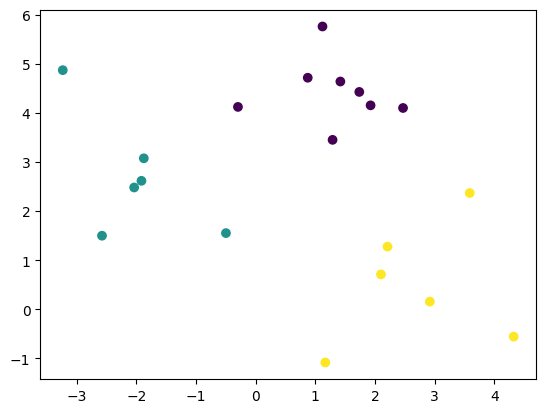

In [10]:
cl.plotKMeans(data, kmeans.labels_)